# Gramener Case Study

This EDA case study is aimed at developing a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

#### Business Objectives: 
If one is able to identify risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

#### Loan Application Decision Types:
When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

    a) **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)
    
    b) **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet   completed.These candidates are not labelled as 'defaulted'.
    
    c) **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan
2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset).
 

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
import math as m

In [2]:
#Importing the data set
# Addressing the error due to column 47 by setting "next_pymnt_d" as object
loan_df = pd.read_csv('./loan.csv', dtype = {'next_pymnt_d':'object'})

## Data Cleaning

In [3]:
#Data Frame Inspection
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan_df.shape

(39717, 111)

In [5]:
#Percentage of missing columns for various columns
100*loan_df.isnull().sum()/len(loan_df.index)

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

In [6]:
#Removing all columns which have more than 90% of NaN values
loan_df.drop(loan_df.columns[100*loan_df.isnull().sum()/len(loan_df.index) > 90],axis=1,inplace=True)

In [7]:
#Checking the number of oolumns remaining
len(loan_df.columns)

55

In [8]:
#Percentage of missing values of various columns after extraction
100*loan_df.isnull().sum()/len(loan_df.index)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [9]:
#Removing columns that are not likely to influence our analysis(static or no variation values)
drop_columns = ['member_id', 'emp_title', 'url', 'desc','title', 'earliest_cr_line',
              'last_pymnt_d','last_credit_pull_d','collection_recovery_fee']
loan_df.drop(drop_columns,axis=1,inplace=True)

In [10]:
#Columns remaining
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 46 columns):
id                            39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_plan                    39717 non-null object
purpose                       39717 non-null object
zip_cod

In [11]:
#proportion of values where loan status is "Current"
100*len(loan_df[(loan_df.loan_status=='Current')])/len(loan_df)

2.8703074250321023

Since this percentage is very low, these rows won't add much value to our analysis and hence can be removed

In [12]:
loan_df = loan_df[~(loan_df.loan_status=='Current')]

In [13]:
#Removing the leading spaces in the "term" column and extracting the term value and converting to integer
loan_df.term = loan_df.term.str.strip()
loan_df.term = loan_df.term.apply(lambda x: int(x[0:2]))

In [14]:
#Converting interest rate to number
loan_df.int_rate = loan_df.int_rate.apply(lambda x:x if pd.isnull(x) else x.split('%')[0])
loan_df.int_rate = loan_df.int_rate.astype('float')

## Data Understanding and Analysis

The strategy in this section is to analyze all the variables thus finding the variables impacting the the default tendency of an applicant.

Derived metrics are created wherever required.

In [15]:
##Creating a derived metric 'loan_Default' with values 1/0 based on whether loan is default or not

#Creating function
def isLoanDefault(x):
    if x == "Charged Off":
        return 1
    else:
        return 0
#Creating derived metric
loan_df["loan_default"] = loan_df.loan_status.apply(isLoanDefault)

In [16]:
#Mean for loan_default
loan_default_mean = round(loan_df.loan_default.mean(),3)
print(loan_default_mean)
#Standard Deviation for loan_default
loan_default_std = round(loan_df.loan_default.std(),2)
print(loan_default_std)

0.146
0.35


In [17]:
#Calculation of UCL and LCL based on t-statistic
delta = (sc.stats.t.ppf(1-0.025, len(loan_df.loan_default)-1))*loan_default_std*(1/m.sqrt(len(loan_df.loan_default)))
print(delta)

0.0034927341984407425


In [18]:
print('UCL: ',round(loan_default_mean+delta,4))
print('LCL: ',round(loan_default_mean-delta,4))

UCL:  0.1495
LCL:  0.1425


The above values can be considered as control limits for looking at driver variables


In [19]:
#Correlation matrix between quantitative variables to understand how each of them are correlated
quant_col = ['revol_util','dti','loan_amnt','funded_amnt','funded_amnt_inv'
            ,'int_rate','installment','annual_inc','total_pymnt','total_pymnt_inv','total_rec_prncp'
            ,'total_rec_int','revol_bal','total_acc','term','total_rec_late_fee','recoveries']


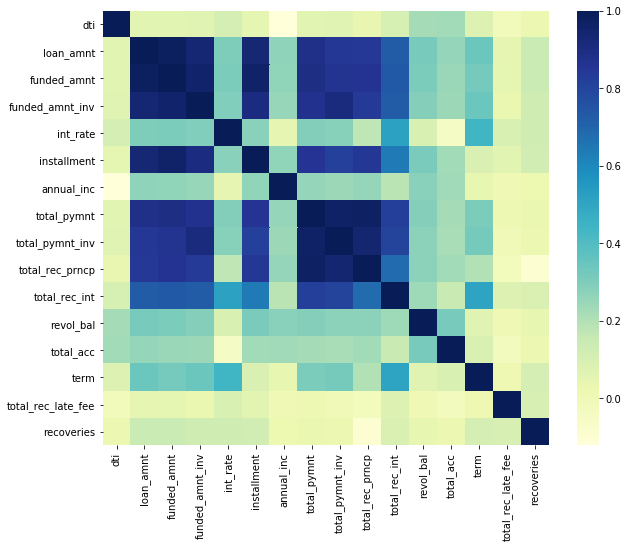

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(loan_df[quant_col].corr(), cmap="YlGnBu")
plt.show()

The following variables are highly correlated
loan_amnt,funded_amnt,funded_amnt_inv,installment,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int.

But most of these variables generated after the loan has been granted to loan applicant and when loan cycle has started. Hence these cannot be considered as driver variables.

In [21]:
#Removing all such variables generated post loan grant
loan_df.drop(['out_prncp','out_prncp_inv', 'funded_amnt_inv','funded_amnt','total_rec_prncp',
                  'total_rec_int','total_pymnt','total_pymnt_inv','total_rec_late_fee','recoveries',
                   'last_pymnt_amnt','issue_d'
                  ,'installment'],axis=1,inplace=True)

In [22]:
#Remaining variables for analysis
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 34 columns):
id                            38577 non-null int64
loan_amnt                     38577 non-null int64
term                          38577 non-null int64
int_rate                      38577 non-null float64
grade                         38577 non-null object
sub_grade                     38577 non-null object
emp_length                    37544 non-null object
home_ownership                38577 non-null object
annual_inc                    38577 non-null float64
verification_status           38577 non-null object
loan_status                   38577 non-null object
pymnt_plan                    38577 non-null object
purpose                       38577 non-null object
zip_code                      38577 non-null object
addr_state                    38577 non-null object
dti                           38577 non-null float64
delinq_2yrs                   38577 non-null int64
inq_last

## Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

### Segmented Univariate Analysis

Finding the percentage of defaults for each variable compared to the total number of records for that variable.

In [23]:
#Defining a new function to find the grouped percentages of "Charged off" accounts
def group_proportion(x):
    gp =100*loan_df.groupby([x,'loan_status'])['id'].count()/loan_df.groupby([x])['id'].count()
    gp = gp.reset_index()
    gp.rename(columns={'id':'proportion(%)'},inplace=True)
    return gp[gp.loan_status=='Charged Off'].sort_values(by='proportion(%)',ascending=False)

#### Variable wise analysis

1. Term

In [24]:
#Percentage of default accounts based on term
group_proportion('term')

,term,loan_status,proportion(%)
2,60,Charged Off,25.313785
0,36,Charged Off,11.090872


It can be observed that almost 25% of the "60 term" accounts are default while only 11% of the "36 term" accounts are default

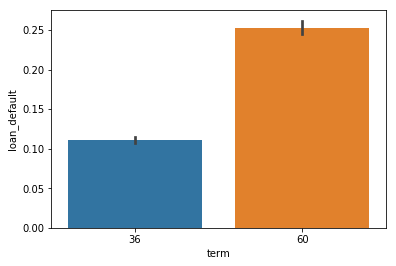

In [25]:
sns.barplot(x='term',y='loan_default',data=loan_df,estimator=np.mean)
plt.show()

Though the tendency to default increased with increase in loan term,we cannot consider it because it is controlled by the lender.

2. Purpose


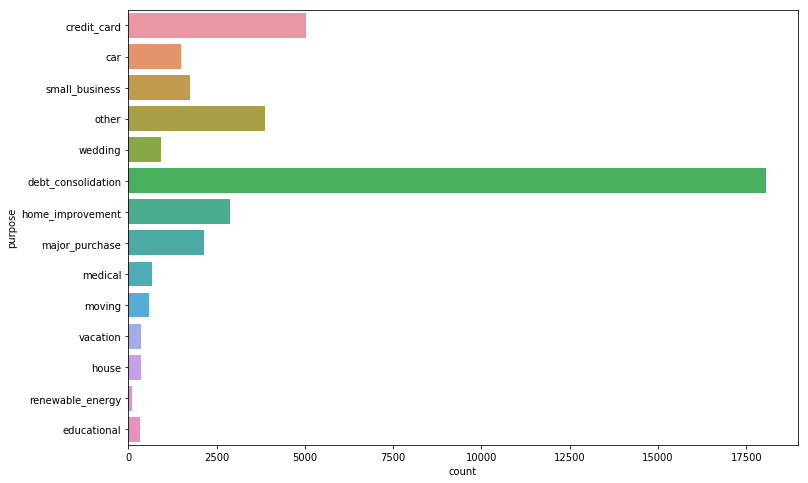

In [26]:
#Distribution of purpose variable 
plt.figure(figsize=(12,8))
sns.countplot(y=loan_df.purpose)
plt.show()

In [27]:
#Percentage of default accounts based on purpose
group_proportion('purpose')

,purpose,loan_status,proportion(%)
22,small_business,Charged Off,27.080958
20,renewable_energy,Charged Off,18.627451
6,educational,Charged Off,17.230769
18,other,Charged Off,16.377749
10,house,Charged Off,16.076294
16,moving,Charged Off,15.972222
14,medical,Charged Off,15.565345
4,debt_consolidation,Charged Off,15.325395
24,vacation,Charged Off,14.133333
8,home_improvement,Charged Off,12.069565


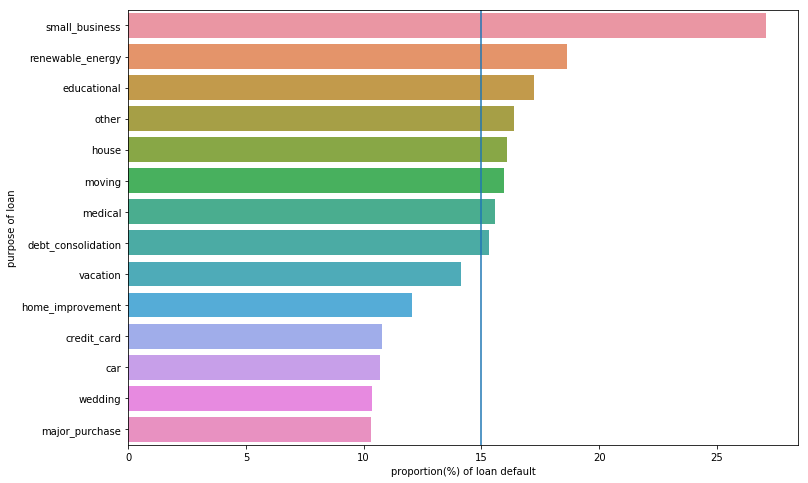

In [28]:
plt.figure(figsize=(12,8))
g = group_proportion('purpose')
sns.barplot(y='purpose',x='proportion(%)',data=g,estimator=np.mean)
plt.axvline(x=15)
plt.xlabel('proportion(%) of loan default')
plt.ylabel('purpose of loan')
plt.show()

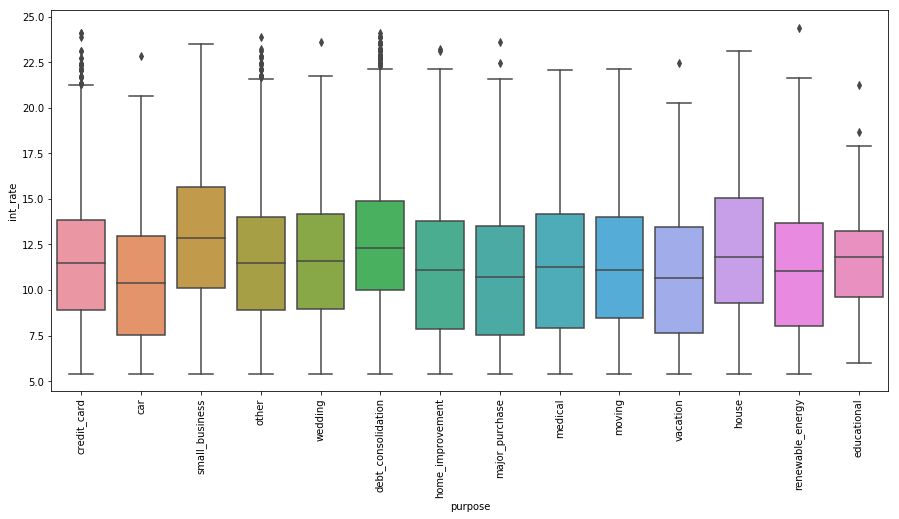

In [29]:
# Comparison of interest rates for each purpose
plt.figure(figsize=(15,7))
sns.boxplot(x="purpose", y="int_rate", data=loan_df)
plt.xticks(rotation=90)
plt.show()

The median interest rates are simiarly distributed for each purpose except for small_businesses which is relatively higher.

Thus * purpose can be defined as a driver * with about 27% default rate and other purposes with impactful default tendency are renewable energy, educational and other.

In [30]:
#Adding purpose as a driver variable
driver_var = ['purpose']

3. emp_length

In [31]:
#it indicates the number of years of employment of loan applicant
group_proportion('emp_length')

,emp_length,loan_status,proportion(%)
2,10+ years,Charged Off,15.680961
14,7 years,Charged Off,15.371128
0,1 year,Charged Off,14.389397
10,5 years,Charged Off,14.339386
20,< 1 year,Charged Off,14.174800
12,6 years,Charged Off,14.160517
16,8 years,Charged Off,14.146341
6,3 years,Charged Off,13.833500
8,4 years,Charged Off,13.824057
4,2 years,Charged Off,13.213703


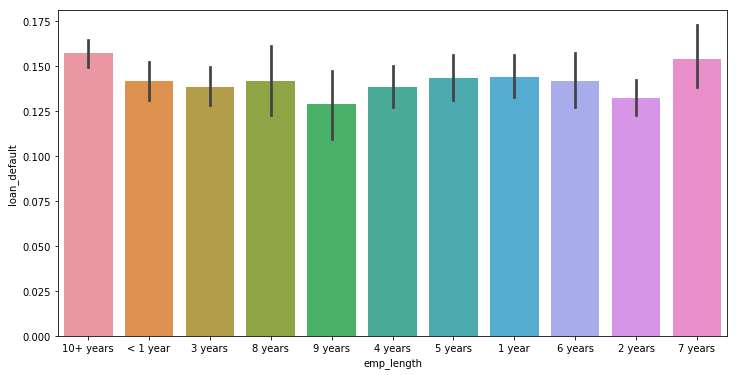

In [32]:
loan_df.emp_length[0:10]
plt.figure(figsize=(12,6))
sns.barplot(x='emp_length',y='loan_default',data=loan_df, estimator=np.mean)
plt.show()

No pattern between emp_length and default percentage

4. addr_state

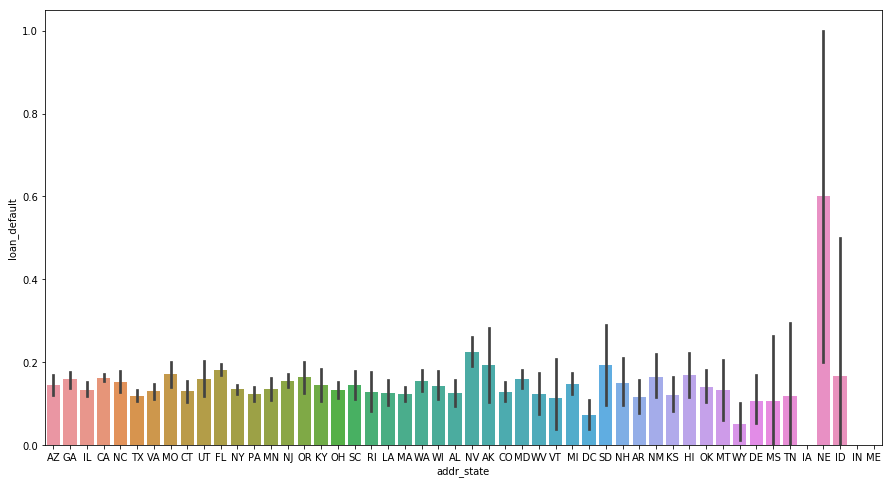

In [33]:
#it indicates the state of the applicant
#Percentage of default wrt to state of residence
plt.figure(figsize=(15,8))
sns.barplot(x='addr_state',y='loan_default',data=loan_df, estimator=np.mean)
plt.show()


In [34]:
print('Number of NE values',len(loan_df[loan_df.addr_state=='NE']))
print('% of values with state NE',round(100*len(loan_df[loan_df.addr_state=='NE'])/len(loan_df),2))

Number of NE values 5
% of values with state NE 0.01


Since NE has few records compared to other states we cannot conclude anything

5. inq_last_6_mnths

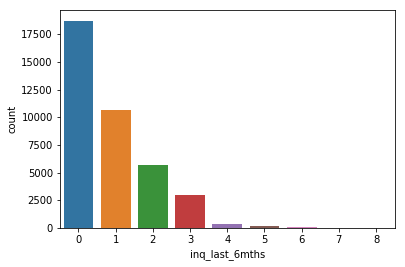

In [35]:
#Percentage of default wrt to inq_last_6_months
sns.countplot(loan_df.inq_last_6mths)
plt.show()

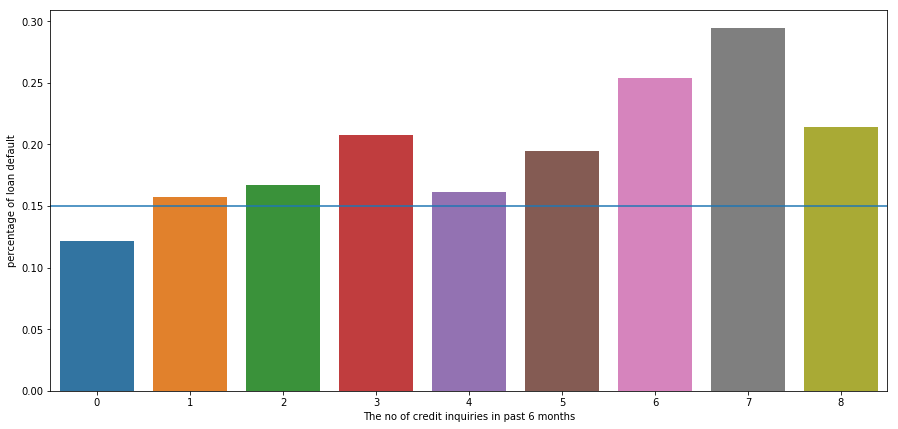

In [36]:
plt.figure(figsize=(15,7))
sns.barplot(x='inq_last_6mths',y='loan_default',data=loan_df, estimator=np.mean,ci=None)
plt.axhline(y=0.15)
plt.xlabel('The no of credit inquiries in past 6 months')
plt.ylabel('percentage of loan default')
plt.show()

In [37]:
group_proportion('inq_last_6mths')

,inq_last_6mths,loan_status,proportion(%)
14,7,Charged Off,29.411765
12,6,Charged Off,25.396825
16,8,Charged Off,21.428571
6,3,Charged Off,20.750922
10,5,Charged Off,19.444444
4,2,Charged Off,16.678458
8,4,Charged Off,16.139241
2,1,Charged Off,15.731707
0,0,Charged Off,12.186648


As we can observe that the default tendency is increasing with increase in the number of inquiries. Hence * inq_last_6mths * is considered as driver variable.

In [38]:
# Adding to the list of driver variable
driver_var.append('inq_last_6mths')

6. pub_rec_bankruptcies
7. pub_rec

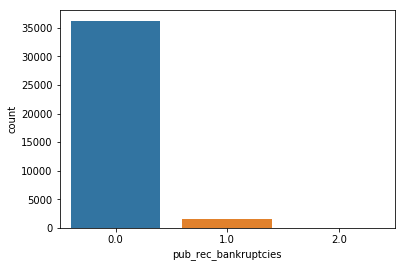

In [39]:
#Percentage of default wrt to pub_rec_bankruptcies
sns.countplot(loan_df.pub_rec_bankruptcies)
plt.show()

In [40]:
#Checking the missing values
loan_df.pub_rec_bankruptcies.isnull().sum()

697

In [41]:
#Since this is low compared to the total records available, replacing missing values with '0'
loan_df.loc[loan_df.pub_rec_bankruptcies.isnull(),'pub_rec_bankruptcies'] = 0

In [42]:
#Defining a new categorical variable to indicate bankruptcy record
loan_df['bankrupt']= loan_df.pub_rec_bankruptcies.apply(lambda x: 1 if x !=0 else 0)

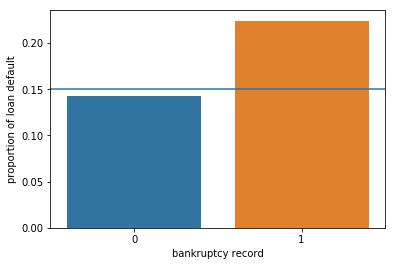

In [43]:
#distribution of default
sns.barplot(x='bankrupt',y='loan_default',data=loan_df, estimator=np.mean,ci=None)
plt.axhline(y= 0.15)
plt.xlabel('bankruptcy record')
plt.ylabel('proportion of loan default')
plt.show()

Thus, *pub_rec_bankruptcy* can be considered as a negative driver variable

In [44]:
#Adding to the list of driver variables
driver_var.append('pub_rec_bankruptcies')

8. delinq_2yrs

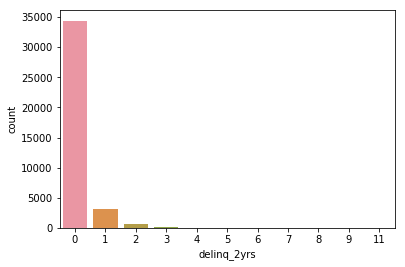

In [45]:
#indicates the number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
#percntage of default wrt delinq_2yrs
sns.countplot(loan_df.delinq_2yrs)
plt.show()

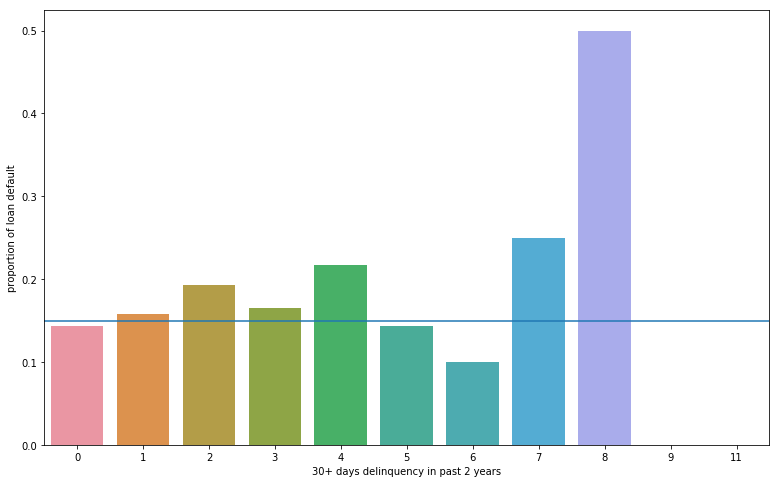

In [46]:
plt.figure(figsize=(13,8))
sns.barplot(x='delinq_2yrs',y='loan_default',data=loan_df, estimator=np.mean,ci=None)
plt.xlabel('30+ days delinquency in past 2 years')
plt.ylabel('proportion of loan default')
plt.axhline(y=0.15)
plt.show()

In [47]:
# The proportion of default for delinq_2yrs
group_proportion('delinq_2yrs')

,delinq_2yrs,loan_status,proportion(%)
16,8,Charged Off,50.000000
14,7,Charged Off,25.000000
8,4,Charged Off,21.666667
4,2,Charged Off,19.316493
6,3,Charged Off,16.509434
2,1,Charged Off,15.809167
0,0,Charged Off,14.354679
10,5,Charged Off,14.285714
12,6,Charged Off,10.000000


It can be observed that with the increase in delinq_2yrs the default tendency increases and hence can be considered as driver variable

In [48]:
#Adding to the list of driver variables
driver_var.append('delinq_2yrs')

9. home_ownership

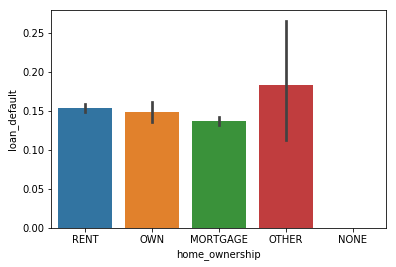

In [49]:
#percentage of default wrt home_ownership
sns.barplot(x='home_ownership',y='loan_default',data=loan_df, estimator=np.mean)
plt.show()

In [50]:
# proportion of default.
group_proportion('home_ownership')

,home_ownership,loan_status,proportion(%)
3,OTHER,Charged Off,18.367347
7,RENT,Charged Off,15.362554
5,OWN,Charged Off,14.890756
0,MORTGAGE,Charged Off,13.671347


Since the proportions do not have a wide difference, we cannot conclude anything

9. annual_inc
10. loan_amnt

In [51]:
#creating a new variable loan income ratio
loan_df['loan_inc_ratio'] = loan_df.loan_amnt/loan_df.annual_inc

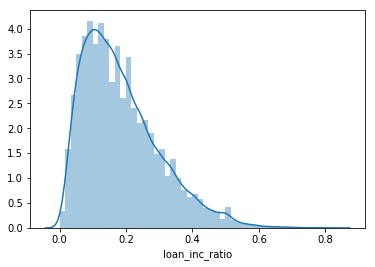

In [52]:
# distribution of loan income ratio
sns.distplot(loan_df.loan_inc_ratio)
plt.show()

In [53]:
#function to divide loan_income_ratio into buckets
def loan_income_ratio_range(x):
    if x >=0 and x <0.1:
        return '0-0.1'
    if x>=0.1 and x < 0.2:
        return '0.1-0.2'
    elif x>=0.2 and x < 0.3:
        return '0.2-0.3'
    elif x>=0.3 and x < 0.4:
        return '0.3-0.4'
    elif x>=0.4 and x < 0.5:
        return '0.4-0.5'
    elif x>=0.5 and x < 0.6:
        return '0.5-0.6'
    elif x>=0.6 and x < 0.7:
        return '0.6-0.7'
    elif x>=0.7 and x < 0.8:
        return '0.7-0.8'
    else:
        return 'above 0.8'

In [54]:
loan_df['total_loan_inc_ratio_range'] = loan_df.loan_inc_ratio.apply(loan_income_ratio_range)

In [55]:
group_proportion('total_loan_inc_ratio_range')

,total_loan_inc_ratio_range,loan_status,proportion(%)
16,above 0.8,Charged Off,50.000000
10,0.5-0.6,Charged Off,32.624113
12,0.6-0.7,Charged Off,27.710843
8,0.4-0.5,Charged Off,24.921924
14,0.7-0.8,Charged Off,23.529412
6,0.3-0.4,Charged Off,20.220588
4,0.2-0.3,Charged Off,15.903027
2,0.1-0.2,Charged Off,12.406804
0,0-0.1,Charged Off,11.292628


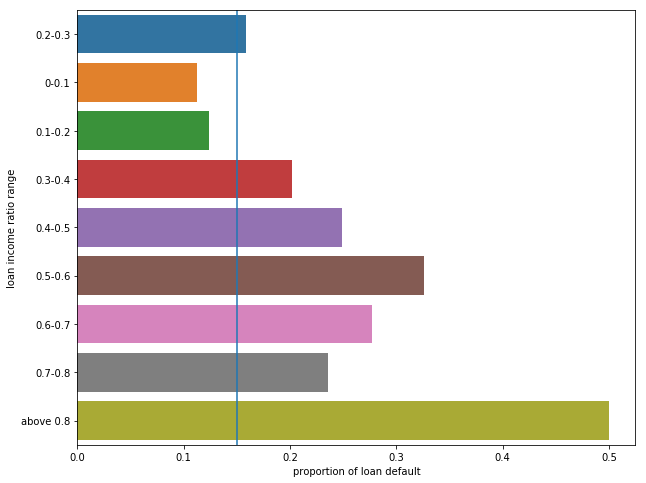

In [56]:
plt.figure(figsize=(10,8))
sns.barplot(y='total_loan_inc_ratio_range',x='loan_default',data=loan_df, estimator=np.mean,ci=None)
plt.axvline(x=0.15)
plt.ylabel('loan income ratio range')
plt.xlabel('proportion of loan default')
plt.show()

There is an increase in default tendency as the loan to income ratio increases more than 40%.
Hence loan to income ratio is a driver variable.

In [57]:
#Adding to the list
driver_var.append('loan_inc_ratio')

11. dti

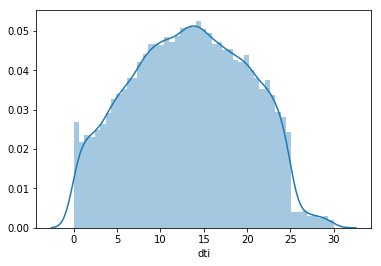

In [58]:
# distribution of dti variables
sns.distplot(loan_df.dti)
plt.show()

In [59]:
#  function to divide dti into buckets
def DTI_Range(x):
    if x >=0 and x <2.5:
        return '0-2.5'
    if x>=2.5 and x < 5:
        return '2.5-5'
    elif x>=5 and x < 7.5:
        return '5-7.5'
    elif x>=7.5 and x < 10:
        return '7.5-10'
    elif x>=10 and x < 12.5:
        return '10-12.5'
    elif x>=12.5 and x < 15:
        return '12.5-15'
    elif x>=15 and x < 17.5:
        return '15-17.5'
    elif x>=17.5 and x < 20:
        return '17.5-20'
    elif x>=20 and x < 22.5:
        return '20-22.5'
    elif x>=22.5 and x < 25:
        return '22.5-25'
    else:
        return 'above 25'

In [60]:
loan_df['dti_range'] = loan_df.dti.apply(DTI_Range)

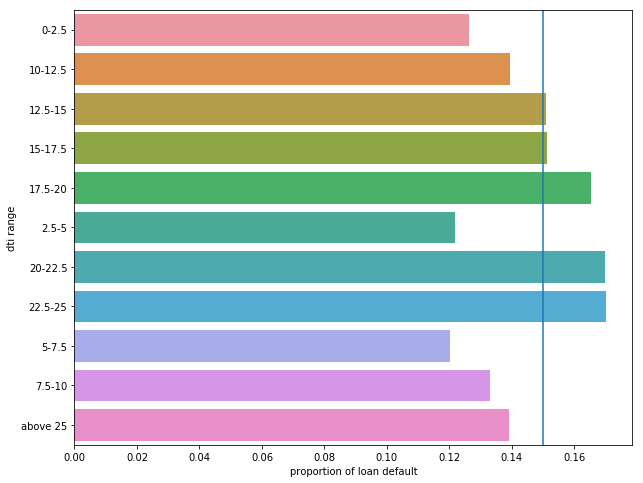

In [61]:
plt.figure(figsize=(10, 8))
sns.barplot(y=loan_df.dti_range.sort_values(),x=loan_df.loan_default,data=loan_df,estimator=np.mean,ci=None)
plt.axvline(x=0.15)
plt.xlabel('proportion of loan default')
plt.ylabel('dti range')
plt.show()

In [62]:
group_proportion('dti_range')

,dti_range,loan_status,proportion(%)
14,22.5-25,Charged Off,17.006803
12,20-22.5,Charged Off,16.971850
8,17.5-20,Charged Off,16.544725
6,15-17.5,Charged Off,15.107914
4,12.5-15,Charged Off,15.094340
2,10-12.5,Charged Off,13.937958
20,above 25,Charged Off,13.920000
18,7.5-10,Charged Off,13.307105
0,0-2.5,Charged Off,12.641674
10,2.5-5,Charged Off,12.181818


The default tendency increases as dti ratio increases beyond 17.5%. Hence considered as a driver

In [63]:
driver_var.append('dti')

12. revol_util

In [64]:
loan_df.revol_util.head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

In [65]:
# convert to value removing % sign
loan_df.revol_util = loan_df.revol_util.apply(lambda x: x if pd.isnull(x) else float(x.split('%')[0]))

In [66]:
# function to divide revolving utilization into buckets
def revol_util_range(x):
    if x >=0 and x <10:
        return '0-10'
    if x>=10 and x < 20:
        return '10-20'
    elif x>=20 and x < 30:
        return '20-30'
    elif x>=30 and x < 40:
        return '30-40'
    elif x>=40 and x < 50:
        return '40-50'
    elif x>=50 and x < 60:
        return '50-60'
    elif x>=60 and x < 70:
        return '60-70'
    elif x>=70 and x < 80:
        return '70-80'
    elif x>=80 and x < 90:
        return '80-90'
    elif x>=90 and x < 100:
        return '90-100'
    else:
        return 'above 100'

In [67]:
loan_df['revol_util_range'] = loan_df.revol_util.apply(revol_util_range)

In [68]:
group_proportion('revol_util_range')

,revol_util_range,loan_status,proportion(%)
20,above 100,Charged Off,32.000000
18,90-100,Charged Off,21.407907
16,80-90,Charged Off,18.868981
14,70-80,Charged Off,17.815945
12,60-70,Charged Off,16.151788
10,50-60,Charged Off,15.070456
8,40-50,Charged Off,14.258600
6,30-40,Charged Off,12.425000
4,20-30,Charged Off,11.197847
2,10-20,Charged Off,10.078455


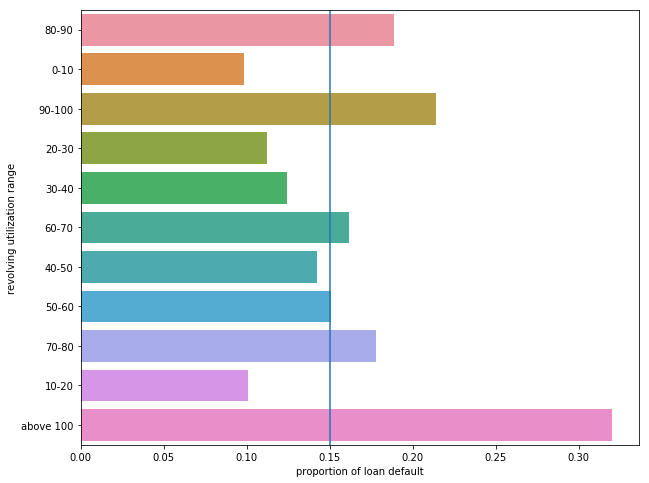

In [69]:
plt.figure(figsize=(10, 8))
sns.barplot(y=loan_df.revol_util_range,x=loan_df.loan_default,data=loan_df,estimator=np.mean,ci=None)
plt.axvline(x= 0.15)
plt.ylabel('revolving utilization range')
plt.xlabel('proportion of loan default')
plt.show()

Default Tendency increases as revolving line utilization rate increased beyond 60% and hence considered as a driver variable

In [70]:
#Adding as a driver variable
driver_var.append('revol_util')

### Conclusion

Checking the correlations between the identified driver variables and int_Rate and term

In [71]:
loan_df[['loan_inc_ratio','revol_util','dti','loan_amnt'
            ,'int_rate','annual_inc','revol_bal','term']].head()

,loan_inc_ratio,revol_util,dti,loan_amnt,int_rate,annual_inc,revol_bal,term
0,0.208333,83.7,27.65,5000,10.65,24000.0,13648,36
1,0.083333,9.4,1.00,2500,15.27,30000.0,1687,60
2,0.195886,98.5,8.72,2400,15.96,12252.0,2956,36
3,0.203252,21.0,20.00,10000,13.49,49200.0,5598,36
5,0.138889,28.3,11.20,5000,7.90,36000.0,7963,36


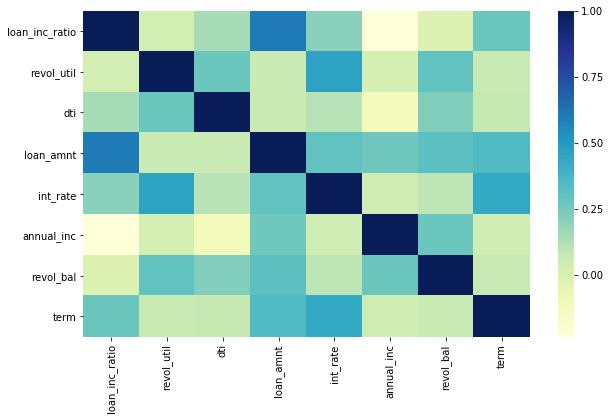

In [72]:
plt.figure(figsize=(10, 6))
sns.heatmap(loan_df[['loan_inc_ratio','revol_util','dti','loan_amnt'
            ,'int_rate','annual_inc','revol_bal','term']].corr(), cmap="YlGnBu")
plt.show()

From the above heat map, it can be observed that no two variables having strong correlation were considered as driver variables.

In [73]:
# list of driver variables influencing the default tendency
print(driver_var)

['purpose', 'inq_last_6mths', 'pub_rec_bankruptcies', 'delinq_2yrs', 'loan_inc_ratio', 'dti', 'revol_util']


## Summary

The following are the driver variables influencing the default tendency and recommendations:

1. **purpose**: purpose of loan: Purposes like small business, renewable energy, education and others have higher default tendency owing to the risk of these ventures.

2. **inq_last_6mths**: The number of inquiries in past 6 months: With increase in the number of inquires in the past 6 months, default tendency increases. 

3. **pub_rec_bankruptcies**: Number of derogatory public records: If the applicant has a record of derogatory public records the tendency for default increases.

4. **delinq_2yrs**: number of 30+ days delinquencies for applicant in past 2 years: There is a increase in default tendency if higher number of delinquencies are reported. 

5. **loan_inc_ratio**: loan to income ratio: The tendency to default increases if loan to income ratio goes beyond 40%. 

6. **revol_util**:Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit: There is an increasing tendency to default as tbe revol_util increase beyond 60%.

7. **dti**: Debt to Income Ratio: The increase in dti is increasing the tendency to default.

The potential loss in these cases can be minimized either by increasing the interest rate, lowering the funding amount or increasing the term if the interest rate is already high.


# Building Logistic Regression Model:

Let's build a logistic regrssion model for the parameters obtained from the above analysis

In [74]:
loan_df.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'loan_default',
       'bankrupt', 'loan_inc_ratio', 'total_loan_inc_ratio_range', 'dti_range',
       'revol_util_range'],
      dtype='object')

In [75]:
driver_var

['purpose',
 'inq_last_6mths',
 'pub_rec_bankruptcies',
 'delinq_2yrs',
 'loan_inc_ratio',
 'dti',
 'revol_util']

In [76]:
dfm = loan_df[['loan_default','purpose','inq_last_6mths','pub_rec_bankruptcies','delinq_2yrs','loan_inc_ratio','revol_util','dti']]

In [77]:
dfm.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [78]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 8 columns):
loan_default            38577 non-null int64
purpose                 38577 non-null object
inq_last_6mths          38577 non-null int64
pub_rec_bankruptcies    38577 non-null float64
delinq_2yrs             38577 non-null int64
loan_inc_ratio          38577 non-null float64
revol_util              38527 non-null float64
dti                     38577 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 3.9+ MB


In [79]:
dfm.isnull().sum()

loan_default             0
purpose                  0
inq_last_6mths           0
pub_rec_bankruptcies     0
delinq_2yrs              0
loan_inc_ratio           0
revol_util              50
dti                      0
dtype: int64

* Since there are 50 missing values in revol_util, we'll try to impute the null values with average

In [80]:
dfm['revol_util'].mean()

48.70277675396472

In [81]:
dfm['revol_util'].fillna((dfm['revol_util'].mean()), inplace=True)

C:\Users\ux012045\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [82]:
# Creating dummy variables for the variable 'purpose'
ml = pd.get_dummies(dfm['purpose'], prefix='purpose')
# Dropping purpose_other column
#ml1 = ml.drop(['purpose_other'], axis=1)
#Adding the results to the master dataframe
dfm=pd.concat([dfm,ml], axis=1)

In [83]:
dfm.head()

,loan_default,purpose,inq_last_6mths,pub_rec_bankruptcies,delinq_2yrs,loan_inc_ratio,revol_util,dti,purpose_car,purpose_credit_card,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,credit_card,1,0.0,0,0.208333,83.7,27.65,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,car,5,0.0,0,0.083333,9.4,1.00,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,small_business,2,0.0,0,0.195886,98.5,8.72,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,other,1,0.0,0,0.203252,21.0,20.00,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,wedding,3,0.0,0,0.138889,28.3,11.20,0,0,...,0,0,0,0,0,0,0,0,0,1


In [84]:
pd.set_option('display.max_columns', None)

In [85]:
dfm.head()

,loan_default,purpose,inq_last_6mths,pub_rec_bankruptcies,delinq_2yrs,loan_inc_ratio,revol_util,dti,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,credit_card,1,0.0,0,0.208333,83.7,27.65,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,car,5,0.0,0,0.083333,9.4,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,small_business,2,0.0,0,0.195886,98.5,8.72,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,other,1,0.0,0,0.203252,21.0,20.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,wedding,3,0.0,0,0.138889,28.3,11.20,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [86]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
dfm.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,loan_default,inq_last_6mths,pub_rec_bankruptcies,delinq_2yrs,loan_inc_ratio,revol_util,dti,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000
mean,0.145864,0.871737,0.042694,0.146668,0.185833,48.702777,13.272727,0.038857,0.130311,0.468025,0.008425,0.074526,0.009513,0.055733,0.017653,0.014931,0.100189,0.002644,0.045468,0.009721,0.024004
std,0.352975,1.071546,0.202809,0.492271,0.115243,28.346353,6.673044,0.193257,0.336649,0.498983,0.091400,0.262629,0.097073,0.229408,0.131688,0.121279,0.300256,0.051353,0.208330,0.098115,0.153063
min,0.000000,0.000000,0.000000,0.000000,0.000789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.098039,25.200000,8.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.163043,49.000000,13.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.250000,72.200000,18.560000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,1.000000,2.000000,0.000000,1.000000,0.347222,87.800000,22.290000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
95%,1.000000,3.000000,0.000000,1.000000,0.410636,93.500000,23.800000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
99%,1.000000,4.000000,1.000000,2.000000,0.520000,98.500000,26.530000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000


## Test-Train Split

### Model Building

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.
Let's start by splitting our data into a training set and a test set.

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
# Putting feature variable to X
X = dfm.drop(['purpose','loan_default','purpose_other'],axis=1)

X.head()

,inq_last_6mths,pub_rec_bankruptcies,delinq_2yrs,loan_inc_ratio,revol_util,dti,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,1,0.0,0,0.208333,83.7,27.65,0,1,0,0,0,0,0,0,0,0,0,0,0
1,5,0.0,0,0.083333,9.4,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0.0,0,0.195886,98.5,8.72,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0.0,0,0.203252,21.0,20.00,0,0,0,0,0,0,0,0,0,0,0,0,0
5,3,0.0,0,0.138889,28.3,11.20,0,0,0,0,0,0,0,0,0,0,0,0,1


In [89]:
# Putting response variable to y
y = dfm['loan_default']

y.head()

0    0
1    1
2    0
3    0
5    0
Name: loan_default, dtype: int64

In [90]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use Standardisation (mean-0, sigma-1) scaling.

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()

X_train[['inq_last_6mths','loan_inc_ratio','revol_util','dti','delinq_2yrs']] = scaler.fit_transform(X_train[['inq_last_6mths','loan_inc_ratio','revol_util','dti','delinq_2yrs']])

X_train.head()

C:\Users\ux012045\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ux012045\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,inq_last_6mths,pub_rec_bankruptcies,delinq_2yrs,loan_inc_ratio,revol_util,dti,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
15947,1.983796,0.0,3.765017,-0.465100,-0.496154,1.064873,1,0,0,0,0,0,0,0,0,0,0,0,0
23862,0.119184,0.0,-0.300434,2.866063,-0.940003,-1.002856,0,0,1,0,0,0,0,0,0,0,0,0,0
11279,-0.813122,0.0,-0.300434,0.570856,1.212310,1.081331,0,1,0,0,0,0,0,0,0,0,0,0,0
32896,-0.813122,0.0,-0.300434,0.265517,0.264729,0.559162,0,0,1,0,0,0,0,0,0,0,0,0,0
36785,0.119184,0.0,-0.300434,-0.449830,-1.056249,0.303314,1,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
### Checking the Churn Rate
defaulters = (sum(dfm['loan_default'])/len(dfm['loan_default'].index))*100
defaulters

14.586411592399617

We have almost 14.5% defaulters rate

 ### Looking at Correlations

In [94]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

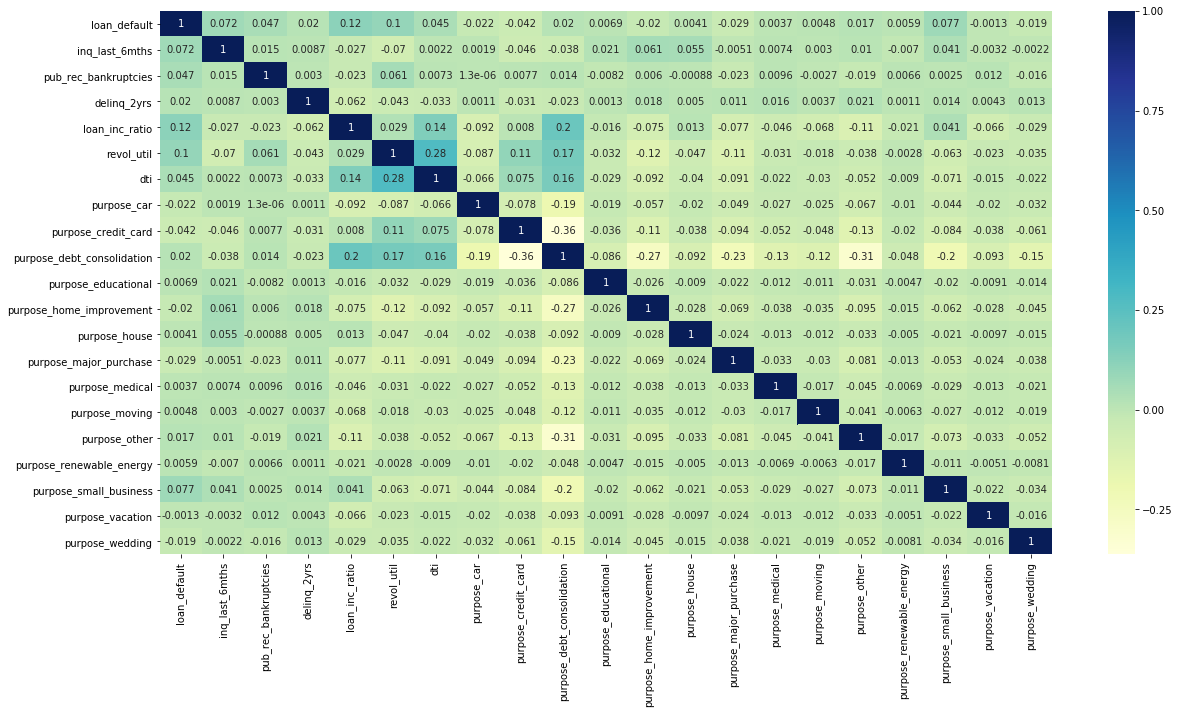

In [95]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(dfm.corr(),annot = True,cmap='YlGnBu')
plt.show()

* We see no element is correlated to each other that strongly which could lay a good foundation for valid prediction 

#### Running Your First Training Model

In [96]:
import statsmodels.api as sm

In [97]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           loan_default   No. Observations:                27003
Model:                            GLM   Df Residuals:                    26983
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10629.
Date:                Mon, 25 Mar 2019   Deviance:                       21258.
Time:                        20:02:02   Pearson chi2:                 2.68e+04
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.5718      0.053    -29.849      0.000      -1.675      -1.469
inq_last_6mths                 0.2213      0.017     13.342      0.000       0.189       0.254
pub_rec_bankruptcies           0.5210      0.074      7.016      0.000       0.375       0.667
delinq_2yrs                    0.0670      0.016      4.082      0.000       0.035       0.099
loan_inc_ratio                 0.3396      0.017     20.086      0.000       0.306       0.373
revol_util                     0.3204      0.019     16.652      0.000       0.283       0.358
dti                            0.0261      0.019      1.375      0.169      -0.011       0.063
purpose_car                   -0.4469      0.117     -3.814      0.000      -0.677      -0.217
purpose_credit_card           -0.7381      0.077     -9.545      0.000      -0.890      -0.587
purpose_debt_consolidation    -0.3785      0.059     -6.366      0.000      -0.495      -0.262
purpose_educational           -0.0962      0.195     -0.493      0.622      -0.478       0.286
purpose_home_improvement      -0.3486      0.087     -4.025      0.000      -0.518      -0.179
purpose_house                 -0.2032      0.181     -1.123      0.261      -0.558       0.151
purpose_major_purchase        -0.4739      0.100     -4.721      0.000      -0.671      -0.277
purpose_medical               -0.0694      0.138     -0.503      0.615      -0.340       0.201
purpose_moving                 0.0675      0.146      0.461      0.645      -0.220       0.355
purpose_renewable_energy       0.2368      0.309      0.767      0.443      -0.368       0.842
purpose_small_business         0.5185      0.085      6.095      0.000       0.352       0.685
purpose_vacation              -0.1579      0.199     -0.792      0.428      -0.549       0.233
purpose_wedding               -0.5876      0.143     -4.101      0.000      -0.868      -0.307
==============================================================================================
"""

 ### Feature Selection Using RFE

In [98]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [99]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [100]:
rfe.support_

array([ True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True])

In [101]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('inq_last_6mths', True, 1),
 ('pub_rec_bankruptcies', True, 1),
 ('delinq_2yrs', False, 3),
 ('loan_inc_ratio', True, 1),
 ('revol_util', True, 1),
 ('dti', False, 5),
 ('purpose_car', True, 1),
 ('purpose_credit_card', True, 1),
 ('purpose_debt_consolidation', True, 1),
 ('purpose_educational', True, 1),
 ('purpose_home_improvement', True, 1),
 ('purpose_house', True, 1),
 ('purpose_major_purchase', True, 1),
 ('purpose_medical', False, 4),
 ('purpose_moving', False, 2),
 ('purpose_renewable_energy', True, 1),
 ('purpose_small_business', True, 1),
 ('purpose_vacation', True, 1),
 ('purpose_wedding', True, 1)]

In [102]:
col = X_train.columns[rfe.support_]

In [103]:
X_train.columns[~rfe.support_]

Index(['delinq_2yrs', 'dti', 'purpose_medical', 'purpose_moving'], dtype='object')

##### Assessing the model with StatsModels

In [104]:
col

Index(['inq_last_6mths', 'pub_rec_bankruptcies', 'loan_inc_ratio',
       'revol_util', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

In [105]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           loan_default   No. Observations:                27003
Model:                            GLM   Df Residuals:                    26987
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10638.
Date:                Mon, 25 Mar 2019   Deviance:                       21276.
Time:                        20:02:03   Pearson chi2:                 2.68e+04
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.5718      0.046    -34.197      0.000      -1.662      -1.482
inq_last_6mths                 0.2214      0.017     13.364      0.000       0.189       0.254
pub_rec_bankruptcies           0.5202      0.074      7.013      0.000       0.375       0.666
loan_inc_ratio                 0.3373      0.017     20.113      0.000       0.304       0.370
revol_util                     0.3233      0.019     17.247      0.000       0.287       0.360
purpose_car                   -0.4543      0.114     -3.977      0.000      -0.678      -0.230
purpose_credit_card           -0.7369      0.073    -10.123      0.000      -0.880      -0.594
purpose_debt_consolidation    -0.3736      0.054     -6.980      0.000      -0.479      -0.269
purpose_educational           -0.1000      0.193     -0.518      0.605      -0.479       0.279
purpose_home_improvement      -0.3488      0.083     -4.219      0.000      -0.511      -0.187
purpose_house                 -0.2061      0.179     -1.151      0.250      -0.557       0.145
purpose_major_purchase        -0.4775      0.097     -4.924      0.000      -0.667      -0.287
purpose_renewable_energy       0.2367      0.308      0.769      0.442      -0.367       0.840
purpose_small_business         0.5202      0.081      6.419      0.000       0.361       0.679
purpose_vacation              -0.1569      0.198     -0.794      0.427      -0.544       0.231
purpose_wedding               -0.5834      0.141     -4.140      0.000      -0.860      -0.307
==============================================================================================
"""

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [106]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [107]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,revol_util,1.08
6,purpose_debt_consolidation,1.07
1,pub_rec_bankruptcies,1.05
2,loan_inc_ratio,1.05
8,purpose_home_improvement,1.03
4,purpose_car,1.02
5,purpose_credit_card,1.02
10,purpose_major_purchase,1.02
0,inq_last_6mths,1.01
9,purpose_house,1.01


#### VIF less than 5 can be considered for analysis
#### Looking at the VIF values, we can say that there is no collinearity between the variables. We are good with the flow. Let's remove all the variabels which have p-value > 0.06


In [108]:
# Removing the variables that has highest p-value
col = col.drop('purpose_educational', 1)
col

Index(['inq_last_6mths', 'pub_rec_bankruptcies', 'loan_inc_ratio',
       'revol_util', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_home_improvement',
       'purpose_house', 'purpose_major_purchase', 'purpose_renewable_energy',
       'purpose_small_business', 'purpose_vacation', 'purpose_wedding'],
      dtype='object')

In [109]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           loan_default   No. Observations:                27003
Model:                            GLM   Df Residuals:                    26988
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10638.
Date:                Mon, 25 Mar 2019   Deviance:                       21276.
Time:                        20:02:04   Pearson chi2:                 2.68e+04
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.5776      0.045    -35.322      0.000      -1.665      -1.490
inq_last_6mths                 0.2212      0.017     13.357      0.000       0.189       0.254
pub_rec_bankruptcies           0.5206      0.074      7.019      0.000       0.375       0.666
loan_inc_ratio                 0.3371      0.017     20.108      0.000       0.304       0.370
revol_util                     0.3235      0.019     17.261      0.000       0.287       0.360
purpose_car                   -0.4485      0.114     -3.944      0.000      -0.671      -0.226
purpose_credit_card           -0.7311      0.072    -10.155      0.000      -0.872      -0.590
purpose_debt_consolidation    -0.3678      0.052     -7.017      0.000      -0.471      -0.265
purpose_home_improvement      -0.3429      0.082     -4.186      0.000      -0.503      -0.182
purpose_house                 -0.2000      0.179     -1.120      0.263      -0.550       0.150
purpose_major_purchase        -0.4716      0.096     -4.896      0.000      -0.660      -0.283
purpose_renewable_energy       0.2424      0.308      0.788      0.431      -0.361       0.845
purpose_small_business         0.5261      0.080      6.553      0.000       0.369       0.683
purpose_vacation              -0.1512      0.197     -0.766      0.444      -0.538       0.236
purpose_wedding               -0.5776      0.140     -4.111      0.000      -0.853      -0.302
==============================================================================================
"""

In [110]:
# Removing the variables that has highest p-value
col = col.drop('purpose_vacation', 1)
col

Index(['inq_last_6mths', 'pub_rec_bankruptcies', 'loan_inc_ratio',
       'revol_util', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_home_improvement',
       'purpose_house', 'purpose_major_purchase', 'purpose_renewable_energy',
       'purpose_small_business', 'purpose_wedding'],
      dtype='object')

In [111]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           loan_default   No. Observations:                27003
Model:                            GLM   Df Residuals:                    26989
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10638.
Date:                Mon, 25 Mar 2019   Deviance:                       21276.
Time:                        20:02:04   Pearson chi2:                 2.68e+04
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.5855      0.044    -36.401      0.000      -1.671      -1.500
inq_last_6mths                 0.2213      0.017     13.363      0.000       0.189       0.254
pub_rec_bankruptcies           0.5195      0.074      7.006      0.000       0.374       0.665
loan_inc_ratio                 0.3376      0.017     20.149      0.000       0.305       0.370
revol_util                     0.3236      0.019     17.270      0.000       0.287       0.360
purpose_car                   -0.4404      0.113     -3.888      0.000      -0.662      -0.218
purpose_credit_card           -0.7233      0.071    -10.139      0.000      -0.863      -0.583
purpose_debt_consolidation    -0.3601      0.052     -6.989      0.000      -0.461      -0.259
purpose_home_improvement      -0.3349      0.081     -4.119      0.000      -0.494      -0.176
purpose_house                 -0.1923      0.178     -1.078      0.281      -0.542       0.157
purpose_major_purchase        -0.4636      0.096     -4.838      0.000      -0.651      -0.276
purpose_renewable_energy       0.2506      0.307      0.815      0.415      -0.352       0.853
purpose_small_business         0.5339      0.080      6.700      0.000       0.378       0.690
purpose_wedding               -0.5696      0.140     -4.065      0.000      -0.844      -0.295
==============================================================================================
"""

In [112]:
# Removing the variables that has highest p-value
col = col.drop('purpose_renewable_energy', 1)
col

Index(['inq_last_6mths', 'pub_rec_bankruptcies', 'loan_inc_ratio',
       'revol_util', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_home_improvement',
       'purpose_house', 'purpose_major_purchase', 'purpose_small_business',
       'purpose_wedding'],
      dtype='object')

In [113]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           loan_default   No. Observations:                27003
Model:                            GLM   Df Residuals:                    26990
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10639.
Date:                Mon, 25 Mar 2019   Deviance:                       21277.
Time:                        20:02:04   Pearson chi2:                 2.68e+04
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.5809      0.043    -36.651      0.000      -1.665      -1.496
inq_last_6mths                 0.2212      0.017     13.359      0.000       0.189       0.254
pub_rec_bankruptcies           0.5205      0.074      7.020      0.000       0.375       0.666
loan_inc_ratio                 0.3375      0.017     20.145      0.000       0.305       0.370
revol_util                     0.3236      0.019     17.271      0.000       0.287       0.360
purpose_car                   -0.4450      0.113     -3.935      0.000      -0.667      -0.223
purpose_credit_card           -0.7279      0.071    -10.241      0.000      -0.867      -0.589
purpose_debt_consolidation    -0.3647      0.051     -7.127      0.000      -0.465      -0.264
purpose_home_improvement      -0.3395      0.081     -4.187      0.000      -0.498      -0.181
purpose_house                 -0.1968      0.178     -1.104      0.270      -0.546       0.153
purpose_major_purchase        -0.4682      0.096     -4.896      0.000      -0.656      -0.281
purpose_small_business         0.5294      0.079      6.662      0.000       0.374       0.685
purpose_wedding               -0.5742      0.140     -4.101      0.000      -0.849      -0.300
==============================================================================================
"""

In [114]:
# Removing the variables that has highest p-value
col = col.drop('purpose_house', 1)
col

Index(['inq_last_6mths', 'pub_rec_bankruptcies', 'loan_inc_ratio',
       'revol_util', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business', 'purpose_wedding'],
      dtype='object')

In [115]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           loan_default   No. Observations:                27003
Model:                            GLM   Df Residuals:                    26991
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10639.
Date:                Mon, 25 Mar 2019   Deviance:                       21278.
Time:                        20:02:05   Pearson chi2:                 2.68e+04
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.5930      0.042    -38.025      0.000      -1.675      -1.511
inq_last_6mths                 0.2202      0.017     13.317      0.000       0.188       0.253
pub_rec_bankruptcies           0.5202      0.074      7.015      0.000       0.375       0.665
loan_inc_ratio                 0.3364      0.017     20.115      0.000       0.304       0.369
revol_util                     0.3244      0.019     17.321      0.000       0.288       0.361
purpose_car                   -0.4329      0.113     -3.844      0.000      -0.654      -0.212
purpose_credit_card           -0.7160      0.070    -10.179      0.000      -0.854      -0.578
purpose_debt_consolidation    -0.3524      0.050     -7.038      0.000      -0.451      -0.254
purpose_home_improvement      -0.3269      0.080     -4.068      0.000      -0.484      -0.169
purpose_major_purchase        -0.4559      0.095     -4.797      0.000      -0.642      -0.270
purpose_small_business         0.5422      0.079      6.890      0.000       0.388       0.696
purpose_wedding               -0.5620      0.140     -4.025      0.000      -0.836      -0.288
==============================================================================================
"""

In [116]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,revol_util,1.07
6,purpose_debt_consolidation,1.07
2,loan_inc_ratio,1.05
1,pub_rec_bankruptcies,1.04
7,purpose_home_improvement,1.03
4,purpose_car,1.02
5,purpose_credit_card,1.02
8,purpose_major_purchase,1.02
0,inq_last_6mths,1.01
9,purpose_small_business,1.01


* All the p-values and VIF are within the limits. We can proceed with the model to predict the loan defaulters

In [117]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

15947    0.129386
23862    0.221007
11279    0.129804
32896    0.124635
36785    0.076306
28208    0.118125
27402    0.126822
33588    0.081643
9050     0.167893
18645    0.157703
dtype: float64

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [118]:
y_train_pred_final = pd.DataFrame({'Defaulters':y_train.values, 'Defaulters_Prob':y_train_pred})
#y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Defaulters,Defaulters_Prob
15947,0,0.129386
23862,0,0.221007
11279,0,0.129804
32896,0,0.124635
36785,0,0.076306


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [119]:
y_train_pred_final['predicted'] = y_train_pred_final.Defaulters_Prob.map(lambda x: 1 if x > 0.18 else 0)

# Let's see the head
y_train_pred_final.head()

,Defaulters,Defaulters_Prob,predicted
15947,0,0.129386,0
23862,0,0.221007,1
11279,0,0.129804,0
32896,0,0.124635,0
36785,0,0.076306,0


In [120]:
from sklearn import metrics

In [121]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Defaulters, y_train_pred_final.predicted )
print(confusion)

[[18031  5043]
 [ 2266  1663]]


In [122]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Defaulters, y_train_pred_final.predicted))

0.7293263711439469


## Metrics beyond simply accuracy

In [123]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [124]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.4232629167727157

In [125]:
# Let us calculate specificity
TN / float(TN+FP)

0.7814423160266967

In [126]:
# Calculate false postive rate - predicting defaulters when customer does not have defaulted
print(FP/ float(TN+FP))

0.21855768397330327


In [127]:
# positive predictive value 
print (TP / float(TP+FP))

0.2479868774232031


In [128]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8883578854017835


#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [129]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [130]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Defaulters, y_train_pred_final.Defaulters_Prob, drop_intermediate = False )

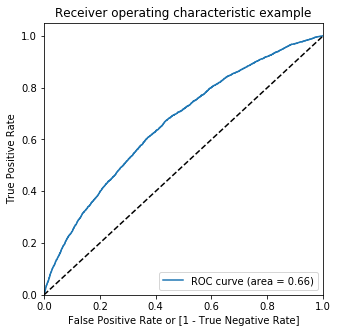

In [131]:
draw_roc(y_train_pred_final.Defaulters, y_train_pred_final.Defaulters_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [132]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Defaulters_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Defaulters,Defaulters_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
15947,0,0.129386,0,1,1,0,0,0,0,0,0,0,0
23862,0,0.221007,1,1,1,1,0,0,0,0,0,0,0
11279,0,0.129804,0,1,1,0,0,0,0,0,0,0,0
32896,0,0.124635,0,1,1,0,0,0,0,0,0,0,0
36785,0,0.076306,0,1,0,0,0,0,0,0,0,0,0


In [133]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Defaulters, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.145502     1.000000     0.000000
0.1   0.1  0.405585     0.849580     0.329982
0.2   0.2  0.767507     0.342326     0.839906
0.3   0.3  0.842536     0.105116     0.968103
0.4   0.4  0.853016     0.031560     0.992892
0.5   0.5  0.854312     0.008654     0.998310
0.6   0.6  0.854720     0.002545     0.999827
0.7   0.7  0.854498     0.000255     0.999957
0.8   0.8  0.854498     0.000000     1.000000
0.9   0.9  0.854498     0.000000     1.000000


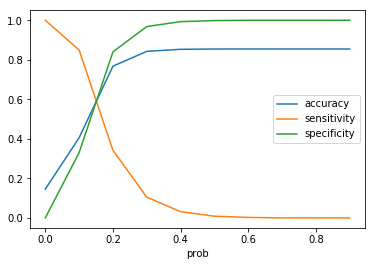

In [134]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the curve above, approximately 0.2 is the optimum point to take it as a cutoff probability.

In [135]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Defaulters_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Defaulters,Defaulters_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
15947,0,0.129386,0,1,1,0,0,0,0,0,0,0,0,0
23862,0,0.221007,1,1,1,1,0,0,0,0,0,0,0,1
11279,0,0.129804,0,1,1,0,0,0,0,0,0,0,0,0
32896,0,0.124635,0,1,1,0,0,0,0,0,0,0,0,0
36785,0,0.076306,0,1,0,0,0,0,0,0,0,0,0,0


In [136]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Defaulters, y_train_pred_final.final_predicted)

0.7675073140021479

In [137]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Defaulters, y_train_pred_final.final_predicted )
confusion2

array([[19380,  3694],
       [ 2584,  1345]], dtype=int64)

## Making predictions on the test set

In [138]:
X_test[['inq_last_6mths','loan_inc_ratio','revol_util','dti','delinq_2yrs']] = scaler.transform(X_test[['inq_last_6mths','loan_inc_ratio','revol_util','dti','delinq_2yrs']])

X_test.head()

C:\Users\ux012045\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\ux012045\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,inq_last_6mths,pub_rec_bankruptcies,delinq_2yrs,loan_inc_ratio,revol_util,dti,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
38675,0.119184,0.0,-0.300434,-0.241189,-0.911822,-0.820321,1,0,0,0,0,0,0,0,0,0,0,0,0
9992,-0.813122,0.0,-0.300434,1.695007,1.578661,1.127713,0,1,0,0,0,0,0,0,0,0,0,0,0
1216,-0.813122,0.0,-0.300434,0.038134,0.173141,-0.138060,0,1,0,0,0,0,0,0,0,0,0,0,0
33902,-0.813122,0.0,-0.300434,0.275522,-0.383431,0.662399,0,1,0,0,0,0,0,0,0,0,0,0,0
8627,0.119184,0.0,-0.300434,0.579348,0.454950,-0.150030,0,0,1,0,0,0,0,0,0,0,0,0,0


In [139]:
X_test_sm = sm.add_constant(X_test[col])

In [140]:
y_test_pred = res.predict(X_test_sm)

In [141]:
y_test_pred[:10]

38675    0.084976
9992     0.196922
1216     0.081733
33902    0.074487
8627     0.171274
20452    0.178306
988      0.184427
35307    0.127064
10330    0.343403
17330    0.054642
dtype: float64

In [142]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [143]:
# Let's see the head
y_pred_1.head()

,0
38675,0.084976
9992,0.196922
1216,0.081733
33902,0.074487
8627,0.171274


In [144]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [145]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [146]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [147]:
y_pred_final.head()

,loan_default,0
0,0,0.084976
1,0,0.196922
2,1,0.081733
3,0,0.074487
4,0,0.171274


In [148]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Defaulters_Prob'})

In [149]:
# Rearranging the columns
y_pred_final.head()

,loan_default,Defaulters_Prob
0,0,0.084976
1,0,0.196922
2,1,0.081733
3,0,0.074487
4,0,0.171274


In [150]:
y_pred_final['final_predicted'] = y_pred_final.Defaulters_Prob.map(lambda x: 1 if x > 0.2 else 0)

In [151]:
y_pred_final.head()

,loan_default,Defaulters_Prob,final_predicted
0,0,0.084976,0
1,0,0.196922,0
2,1,0.081733,0
3,0,0.074487,0
4,0,0.171274,0


In [152]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.loan_default, y_pred_final.final_predicted)

0.7628304821150855

In [153]:
confusion2 = metrics.confusion_matrix(y_pred_final.loan_default, y_pred_final.final_predicted )
confusion2

array([[8249, 1627],
       [1118,  580]], dtype=int64)

In [154]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [155]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.3415783274440518

In [156]:
# Let us calculate specificity
TN / float(TN+FP)

0.835257189145403

### Summary

* Our Model achieved 71.4% test data and 76.8% accuracy on train data.
* Since there is no much difference between the accuracies of prediction of the train data and test data, We can consider this model a pretty good one.
* Our model prediction can also be made better by considering the better deciding factors like credit score,customer purchase power,etc